## Output has been removed from this notebook to reduce file sizes in the repo

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas.io.osm as osm
%matplotlib inline

C:\Users\spm448\Anaconda\DLLs


## Download OpenStreetMap restaurants for a good part of the Bay Area

###### Note: used http://boundingbox.klokantech.com/ to get the bounding box

In [18]:
gdf = osm.query_osm('node', 
                    bbox=[-122.8662,37.1373,-121.4798,38.2158],
                    tags='amenity=restaurant')

In [19]:
gdf = gdf[gdf.type == 'Point'].to_crs(epsg=3740)
print gdf.geometry.head(3)
print len(gdf)

0      POINT (570106.425976538 4186530.13166448)
1    POINT (604695.3525471315 4172719.445738724)
2    POINT (551608.2769317736 4160852.569819334)
Name: geometry, dtype: object
188


In [20]:
x, y = zip(*[(p.x, p.y) for (i, p) 
             in gdf.geometry.iteritems()])
x = pd.Series(x)
y = pd.Series(y)

## Get OpenStreetMap networks for Bay Area that I had previously - someday soon we'll have direct OSM import

In [3]:
store = pd.HDFStore('manhattan.h5', "r")
nodes = store.nodes
edges = store.edges
print nodes.head(3)
print edges.head(3)

                  x          y
id                            
42421828 -73.976212  40.725326
42421833 -73.975785  40.725920
42421837 -73.975314  40.726545
       from         to    distance
0  42421828   42430942  101.478025
1  42421833   42421828   75.236335
2  42421833  274335455  101.804341


## Initialize and preprocess the network

In [6]:
net=pdna.Network(nodes.x, 
                       nodes.y, 
                       edges["from"], 
                       edges.to, 
                       edges[["distance"]])
net.precompute(3000)

## Nearest *point-of-interest* queries

In [7]:
net.init_pois(num_categories=1, max_dist=2000, max_pois=10)

In [8]:
net.set_pois("fire_stations", x, y)

NameError: name 'x' is not defined

In [15]:
a = net.nearest_pois(2000, "restaurants", num_pois=10)
print a.head(1)

     1     2     3     4     5     6     7     8     9     10
8  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000


In [16]:
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
bbox=[-122.539365,37.693047,-122.347698,37.816069]
bbox = gpd.GeoSeries([Point(bbox[0], bbox[1]),
                      Point(bbox[2], bbox[3])], 
                     crs=from_epsg(4326))
bbox = bbox.to_crs(epsg=3740)
bbox = [bbox[0].x, bbox[0].y, bbox[1].x, bbox[1].y]

## Here's a map of the distance to the nearest restaurant

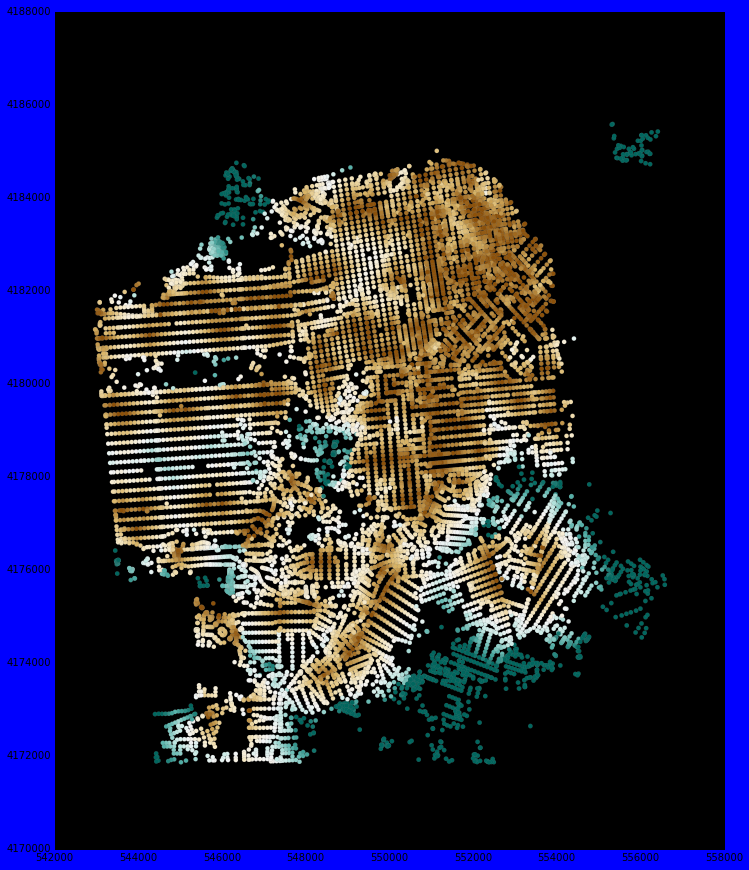

In [17]:
net.plot(a[1], bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 5th nearest restaurant

In [ ]:
net.plot(a[5], bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 10th nearest restaurant

In [ ]:
net.plot(a[10], bbox=bbox, scheme="diverging", 
         color="BrBG")

# A similar workflow is used to do general network aggregations

## Relate the x-ys to nodes

In [ ]:
node_ids = net.get_node_ids(x, y)

## Assign the variable (in this case just location) to the network

In [ ]:
net.set(node_ids)

## This is it - run the queries!

In [ ]:
%time s = net.aggregate(500, type="sum", decay="linear")
%time t = net.aggregate(1000, type="sum", decay="linear")
%time u = net.aggregate(2000, type="sum", decay="linear")
%time v = net.aggregate(3000, type="sum", decay="linear")
%time w = net.aggregate(3000, type="count", decay="flat")

## Here's a map of access to restaurants with a 500m radius

In [ ]:
net.plot(s, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 1000 meters

In [ ]:
net.plot(t, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 2000 meters radius

In [ ]:
net.plot(u, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 3000m radius

In [ ]:
net.plot(v, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or the whole Bay Area region - someone please help me with this visualization!

In [ ]:
net.plot(v, scheme="diverging", 
         color="BrBG", log_scale=True)